<a href="https://colab.research.google.com/github/ewerton-lemes/Analise_de_dados_da_F1/blob/main/An%C3%A1lise_de_dados_da_Formula_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de dados da Fórmula 1

Os dados usados neste nesse notebook estão disponíveis em https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020

## Pacotes

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importando pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Quais e quantas são as nacionalidades dos pilotos de F1 que correram de 1950 a 2022?

In [89]:
# Carregando o dataset dos pilotos
pilotos = pd.read_csv('drive/MyDrive/Colab Notebooks/Portifólio/Formula 1/Dados/drivers.csv')

In [90]:
# Visualizar o dataset pilotos
pilotos.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [91]:
# Formato da tabela
pilotos.shape

(857, 9)

In [92]:
# Verificando se há dados faltantes
pilotos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     857 non-null    int64 
 1   driverRef    857 non-null    object
 2   number       857 non-null    object
 3   code         857 non-null    object
 4   forename     857 non-null    object
 5   surname      857 non-null    object
 6   dob          857 non-null    object
 7   nationality  857 non-null    object
 8   url          857 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.4+ KB


In [93]:
#Nacionalidade dos pilotos
nacionalidades_pilotos = pilotos['nationality'].unique()
for i in nacionalidades_pilotos:
  print(i)

British
German
Spanish
Finnish
Japanese
French
Polish
Brazilian
Italian
Australian
Austrian
American
Dutch
Colombian
Portuguese
Canadian
Indian
Hungarian
Irish
Danish
Argentine
Czech
Malaysian
Swiss
Belgian
Monegasque
Swedish
Venezuelan
New Zealander
Chilean
Mexican
South African
Liechtensteiner
Rhodesian
American-Italian
Uruguayan
Argentine-Italian
Thai
East German
Russian
Indonesian
Chinese


In [94]:
# Total de nacionalidades dos pilotos que correram na F1
nacionalidades_pilotos.shape[0]

42

**Conclusão:**

De 1950 a 2022 houveram pilotos de 42 nacionalidades diferentes na F1. São elas: britânico, alemão, espanhol, finlandês, japonês, francês, polonês, brasileiro, italiano, australiano, austríaco, americano, holandês, colombiano, português, canadense, indiano, húngaro, irlandês, dinamarquês, argentino, tcheco, malaio, suíço, belga, monegasco, sueco, venezuelano, neozelandês, chileno, mexicano, sul africano, liechtensteinense, rodesiano, americano-italiano, uruguaio, argentino-italiano, tailandês, alemão oriental, russo, indonésio, chinês.

## Quantos pilotos de cada nacinalidade correram na F1 entre 1950 a 2022?





In [95]:
# Contagem da nacionalidade dos pilotos
contagem_nacionalidade_pilotos = pilotos['nationality'].value_counts()
contagem_nacionalidade_pilotos

British              165
American             158
Italian               99
French                73
German                50
Brazilian             32
Argentine             24
Belgian               23
Swiss                 23
South African         23
Japanese              20
Dutch                 18
Australian            18
Austrian              15
Spanish               15
Canadian              14
Swedish               10
Finnish                9
New Zealander          9
Mexican                6
Irish                  5
Danish                 5
Monegasque             4
Russian                4
Uruguayan              4
Portuguese             4
Rhodesian              4
East German            3
Venezuelan             3
Colombian              3
Indian                 2
Thai                   2
Indonesian             1
Argentine-Italian      1
Czech                  1
American-Italian       1
Liechtensteiner        1
Chilean                1
Malaysian              1
Hungarian              1


In [10]:
contagem_nacionalidade_pilotos.values

array([165, 158,  99,  73,  50,  32,  24,  23,  23,  23,  20,  18,  18,
        15,  15,  14,  10,   9,   9,   6,   5,   5,   4,   4,   4,   4,
         4,   3,   3,   3,   2,   2,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1])

In [11]:
# Data frame com as nacionalidades traduzidas
nacionalidades_traduzidas = ['britânico', 'alemão', 'espanhol', 'finlandês', 'japonês', 'francês', 'polonês', 'brasileiro', 'italiano', 'australiano', 'austríaco', 'americano', 'holandês', 'colombiano', 'português', 'canadense', 'indiano', 'húngaro', 'irlandês', 'dinamarquês', 'argentino', 'tcheco', 'malaio', 'suíço', 'belga', 'monegasco', 'sueco', 'venezuelano', 'neozelandês', 'chileno', 'mexicano', 'sul africano', 'liechtensteinense', 'rodesiano', 'americano-italiano', 'uruguaio', 'argentino-italiano', 'tailandês', 'alemão oriental', 'russo', 'indonésio', 'chinês']
colunas = [nacionalidades_traduzidas, contagem_nacionalidade_pilotos.values]

In [12]:
contagem_nacionalidade_pilotos = pd.DataFrame(colunas, index=['nacionalidade', 'quantidade']).T


**Conclusão:**

In [13]:
contagem_nacionalidade_pilotos

,nacionalidade,quantidade
0,britânico,165
1,alemão,158
2,espanhol,99
3,finlandês,73
4,japonês,50
5,francês,32
6,polonês,24
7,brasileiro,23
8,italiano,23
9,australiano,23


In [96]:
# salvando a tabela
contagem_nacionalidade_pilotos.to_csv('drive/MyDrive/Colab Notebooks/Portifólio/Formula 1/Dados/contagem_nacionalidade_pilotos.csv', index=False)

## Quais são os continentes de origem dos pilotos de F1 e qual teve a maior quantidade de pilotos?

In [14]:
# continentes dos pilotos
europa = ['britânico', 'francês', 'alemão', 'espanhol', 'finlandês', 'polonês', 'italiano', 'austríaco', 'holandês', 'português', 'húngaro', 'irlandês', 'dinamarquês', 'tcheco', 'suíço', 'belga', 'monegasco', 'sueco', 'liechtensteinense', 'alemão oriental']
asia = ['japonês', 'indiano', 'malaio', 'tailandês', 'russo', 'indonésio', 'chinês']
america_do_sul = ['brasileiro', 'colombiano', 'argentino', 'venezuelano', 'chileno', 'uruguaio', 'argentino-italiano']
america_do_norte = ['americano', 'canadense', 'mexicano', 'americano-italiano']
oceania = ['australiano', 'neozelandês']
africa = ['sul africano', 'rodesiano']

def continente(pais):
  if pais in europa:
    return 'Europa'
  if pais in asia:
    return 'Ásia'
  if pais in america_do_norte:
    return 'América do Norte'
  if pais in america_do_sul:
    return 'América do Sul'
  if pais in oceania:
    return 'Oceania'
  if pais in africa:
    return 'Africa'

continentes = list(map(continente, nacionalidades_traduzidas))

contagem_nacionalidade_pilotos['continente'] = continentes

contagem_nacionalidade_pilotos

,nacionalidade,quantidade,continente
0,britânico,165,Europa
1,alemão,158,Europa
2,espanhol,99,Europa
3,finlandês,73,Europa
4,japonês,50,Ásia
5,francês,32,Europa
6,polonês,24,Europa
7,brasileiro,23,América do Sul
8,italiano,23,Europa
9,australiano,23,Oceania


In [15]:
# contagem por continente dos pilotos
continente_dos_pilotos = contagem_nacionalidade_pilotos.groupby('continente').count()
continente_dos_pilotos.reset_index()

,continente,nacionalidade,quantidade
0,Africa,2,2
1,América do Norte,4,4
2,América do Sul,7,7
3,Europa,20,20
4,Oceania,2,2
5,Ásia,7,7


In [16]:
continente_dos_pilotos = continente_dos_pilotos.drop('nacionalidade', axis=1).reset_index()

In [97]:
continente_dos_pilotos.reset_index().to_csv('drive/MyDrive/Colab Notebooks/Portifólio/Formula 1/Dados/drivers.csv', index=False)

,continente,quantidade
3,Europa,20
2,América do Sul,7
5,Ásia,7
1,América do Norte,4
0,Africa,2
4,Oceania,2


In [17]:
continente_dos_pilotos.sort_values(by='quantidade', ascending=False, inplace=True)

In [98]:
continente_dos_pilotos.reset_index().to_csv('drive/MyDrive/Colab Notebooks/Portifólio/Formula 1/Dados/continente_dos_pilotos.csv', index=False)

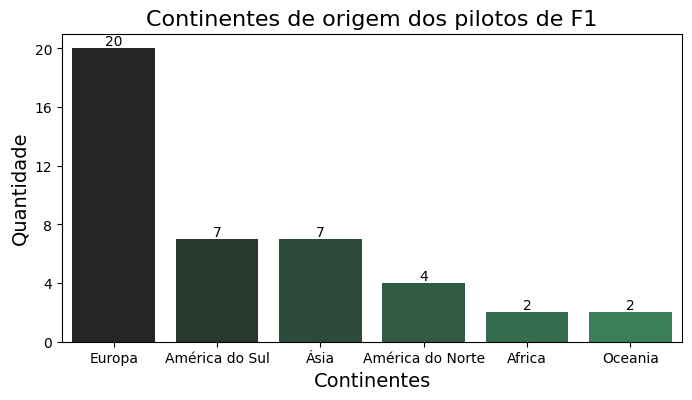

In [103]:
# paleta de cores
paleta = sns.dark_palette("seagreen")
sns.set_palette(paleta)

# Gráfico para visualização dos continentes dos pilotos
plt.figure(figsize=(8,4))
fig1 = sns.barplot(data=continente_dos_pilotos, x='continente', y='quantidade')

for i in fig1.patches:
  fig1.annotate(text = int(i.get_height()), xy = (i.get_x() + .4, i.get_height() + .2), ha='center')

plt.title('Continentes de origem dos pilotos de F1', fontsize=16)
fig1.set_yticks(range(0, 23, 4))
plt.xlabel('Continentes', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)

plt.savefig('drive/MyDrive/Colab Notebooks/Portifólio/Formula 1/Dados/continentes_pilotos.png', bbox_inches='tight')

plt.show()

**Conclusão:**

Os continentes de origem dos pilotos de são: if pais in europa: Europa, Ásia, América do Norte, América do Sul, Oceania e África. Entre 1950 e 2022, a maioria dos pilotos que correram na F1 foram europeus.

## Quantos são e quais os nomes dos pilotos brasileiros que correram na F1 de 1950 e 2022?

In [19]:
# visualizando o dataset dos pilotos
pilotos.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [20]:
pilotos.nationality.unique()

array(['British', 'German', 'Spanish', 'Finnish', 'Japanese', 'French',
       'Polish', 'Brazilian', 'Italian', 'Australian', 'Austrian',
       'American', 'Dutch', 'Colombian', 'Portuguese', 'Canadian',
       'Indian', 'Hungarian', 'Irish', 'Danish', 'Argentine', 'Czech',
       'Malaysian', 'Swiss', 'Belgian', 'Monegasque', 'Swedish',
       'Venezuelan', 'New Zealander', 'Chilean', 'Mexican',
       'South African', 'Liechtensteiner', 'Rhodesian',
       'American-Italian', 'Uruguayan', 'Argentine-Italian', 'Thai',
       'East German', 'Russian', 'Indonesian', 'Chinese'], dtype=object)

In [21]:
# pilotos brasileiros
pilotos_brasileiros = pilotos.query("nationality == 'Brazilian'")[['forename', 'surname']]
pilotos_brasileiros

,forename,surname
11,Nelson,Piquet Jr.
12,Felipe,Massa
21,Rubens,Barrichello
40,Ricardo,Zonta
41,Antônio,Pizzonia
42,Cristiano,da Matta
53,Luciano,Burti
57,Tarso,Marques
58,Enrique,Bernoldi
63,Pedro,Diniz


In [22]:
# nomes dos pilotos brasileiros
pilotos_brasileiros_nomes = []
for i in range(0, len(pilotos_brasileiros)):
  pilotos_brasileiros_nomes.append(pilotos_brasileiros['forename'].values[i] + ' ' + pilotos_brasileiros['surname'].values[i])
pilotos_brasileiros_nomes

['Nelson Piquet Jr.',
 'Felipe Massa',
 'Rubens Barrichello',
 'Ricardo Zonta',
 'Antônio Pizzonia',
 'Cristiano da Matta',
 'Luciano Burti',
 'Tarso Marques',
 'Enrique Bernoldi',
 'Pedro Diniz',
 'Ricardo Rosset',
 'Roberto Moreno',
 'Ayrton Senna',
 'Christian Fittipaldi',
 'Maurício Gugelmin',
 'Nelson Piquet',
 'Chico Serra',
 'Raul Boesel',
 'Emerson Fittipaldi',
 'Alex Ribeiro',
 'Carlos Pace',
 'Ingo Hoffmann',
 'Wilson Fittipaldi',
 'Luiz Bueno',
 "Fritz d'Orey",
 'Chico Landi',
 'Hernando da Silva Ramos',
 'Gino Bianco',
 'Lucas di Grassi',
 'Bruno Senna',
 'Felipe Nasr',
 'Pietro Fittipaldi']

**Conclusão:**

Entre 1950 e 2022, 32 pilotos brasiliros correram na F1. Esses são os seus nomes: Nelson Piquet Jr., Felipe Massa, Rubens Barrichello, Ricardo Zonta, Antônio Pizzonia, Cristiano da Matta, Luciano Burti, Tarso Marques, Enrique Bernoldi, Pedro Diniz, Ricardo Rosset, Roberto Moreno, Ayrton Senna, Christian Fittipaldi, Maurício Gugelmin, Nelson Piquet, Chico Serra, Raul Boesel, Emerson Fittipaldi, Alex Ribeiro, Carlos Pace, Ingo Hoffmann, Wilson Fittipaldi, Luiz Bueno, Fritz d'Orey, Chico Landi, Hernando da Silva Ramos, Gino Bianco, Lucas di Grassi, Bruno Senna, Felipe Nasr, Pietro Fittipaldi

## Quantos grandes prêmios cada brasileiro disputou?

In [23]:
#visualizando o dataset dos resultados
resultados = pd.read_csv('drive/MyDrive/Colab Notebooks/Portifólio/Formula 1/Dados/results.csv')

In [24]:
resultados.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [25]:
# Verificando dados faltantes
resultados.shape

(25840, 18)

In [26]:
resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25840 entries, 0 to 25839
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25840 non-null  int64  
 1   raceId           25840 non-null  int64  
 2   driverId         25840 non-null  int64  
 3   constructorId    25840 non-null  int64  
 4   number           25840 non-null  object 
 5   grid             25840 non-null  int64  
 6   position         25840 non-null  object 
 7   positionText     25840 non-null  object 
 8   positionOrder    25840 non-null  int64  
 9   points           25840 non-null  float64
 10  laps             25840 non-null  int64  
 11  time             25840 non-null  object 
 12  milliseconds     25840 non-null  object 
 13  fastestLap       25840 non-null  object 
 14  rank             25840 non-null  object 
 15  fastestLapTime   25840 non-null  object 
 16  fastestLapSpeed  25840 non-null  object 
 17  statusId    

In [27]:
#localizando os id dos pilotos brasileiros
pilotos_id = pilotos.query("nationality == 'Brazilian'")['driverId']
pilotos_id.head()

11    12
12    13
21    22
40    41
41    42
Name: driverId, dtype: int64

In [28]:
# Identificando os pilotos brasileiros no DataFrame pilotos
brasileiro = []
for i in resultados.driverId.values:
  if i in pilotos_id.values:
    brasileiro.append(True)
  else:
    brasileiro.append(False)

In [29]:
resultados['brasileiro'] = brasileiro

In [30]:
# contando o número de corridas dos brasileiros
numero_de_corridas = resultados.query('brasileiro == True').groupby('driverId')[['driverId']].count()
numero_de_corridas.columns = ['numero_de_corridas']
numero_de_corridas.head()

,numero_de_corridas
driverId,
12,28
13,271
22,326
41,38
42,20


In [31]:
# nomes dos pilotos brasileiros por id
numero_de_corridas_por_piloto = pilotos.query("nationality == 'Brazilian'")[['driverId', 'forename', 'surname']]
numero_de_corridas_por_piloto.set_index('driverId', inplace=True)
numero_de_corridas_por_piloto.head()

,forename,surname
driverId,,
12,Nelson,Piquet Jr.
13,Felipe,Massa
22,Rubens,Barrichello
41,Ricardo,Zonta
42,Antônio,Pizzonia


In [32]:
 #juntando os datasets com os nomes e com a quantidade de corridas
 numero_de_corridas_por_piloto = numero_de_corridas_por_piloto.join(numero_de_corridas)
 numero_de_corridas_por_piloto.head()

,forename,surname,numero_de_corridas
driverId,,,
12,Nelson,Piquet Jr.,28
13,Felipe,Massa,271
22,Rubens,Barrichello,326
41,Ricardo,Zonta,38
42,Antônio,Pizzonia,20


In [33]:
# juntando os nomes dos pilotos
numero_de_corridas_por_piloto['nome'] = numero_de_corridas_por_piloto['forename'].str.cat(numero_de_corridas_por_piloto['surname'], sep =" ")
numero_de_corridas_por_piloto.drop(['forename', 'surname'], axis=1, inplace=True)
numero_de_corridas_por_piloto.head()

,numero_de_corridas,nome
driverId,,
12,28,Nelson Piquet Jr.
13,271,Felipe Massa
22,326,Rubens Barrichello
41,38,Ricardo Zonta
42,20,Antônio Pizzonia


In [34]:
# Reordenando as colunas do dataset
numero_de_corridas_por_piloto = pd.DataFrame([numero_de_corridas_por_piloto.nome.values, numero_de_corridas_por_piloto.numero_de_corridas.values])

In [35]:
numero_de_corridas_por_piloto = numero_de_corridas_por_piloto.T
numero_de_corridas_por_piloto.columns = ['nome', 'numero_de_corridas']
numero_de_corridas_por_piloto.head()

,nome,numero_de_corridas
0,Nelson Piquet Jr.,28
1,Felipe Massa,271
2,Rubens Barrichello,326
3,Ricardo Zonta,38
4,Antônio Pizzonia,20


In [36]:
numero_de_corridas_por_piloto.sort_values(by='numero_de_corridas', ascending=False, inplace=True)
numero_de_corridas_por_piloto.head()

,nome,numero_de_corridas
2,Rubens Barrichello,326
1,Felipe Massa,271
15,Nelson Piquet,207
12,Ayrton Senna,162
18,Emerson Fittipaldi,149


In [102]:
numero_de_corridas_por_piloto.to_csv('drive/MyDrive/Colab Notebooks/Portifólio/Formula 1/Dados/numero_de_corridas_por_piloto.csv', index=False)

**Conclusão**

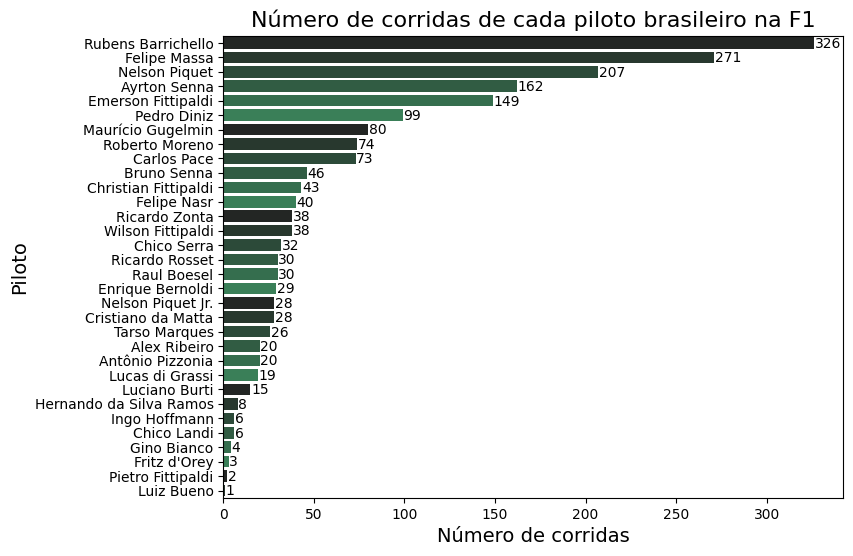

In [105]:
paleta = sns.dark_palette("seagreen")
sns.set_palette(paleta)

# Gráfico para visualização do número de corridas dos pilotos brasileiros
plt.figure(figsize=(8,6))
fig2 = sns.barplot(data=numero_de_corridas_por_piloto, x='numero_de_corridas', y='nome', orient='h', palette=paleta)

for i in fig2.patches:
  fig2.annotate(text = int(i.get_width()), xy = (i.get_width() + .4, i.get_y() + .45), va='center')

plt.title('Número de corridas de cada piloto brasileiro na F1', fontsize=16)
plt.xlabel('Número de corridas', fontsize=14)
plt.ylabel('Piloto', fontsize=14)

plt.savefig('drive/MyDrive/Colab Notebooks/Portifólio/Formula 1/Dados/corridas_pilotos_brasileiros.png')

plt.show()

## Como os carros de F1 evoluiram com o tempo?

O objetivo aqui é ver como os carros ficaram mais rápidos (ou não) ao longo do tempo. A Fórmula 1 já correu em muitos circuitos diferentes, então vamos adotar um circuito como referência para que as comparações sejam feitas no mesmo circuito. Vamos visualizar o dataset 'circuits.csv'.

In [122]:
# visualizando o dataset dos circuitos
circuitos = pd.read_csv('drive/MyDrive/Colab Notebooks/Portifólio/Formula 1/Dados/circuits.csv')

In [123]:
circuitos.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [124]:
circuitos.name.unique()

array(['Albert Park Grand Prix Circuit', 'Sepang International Circuit',
       'Bahrain International Circuit', 'Circuit de Barcelona-Catalunya',
       'Istanbul Park', 'Circuit de Monaco', 'Circuit Gilles Villeneuve',
       'Circuit de Nevers Magny-Cours', 'Silverstone Circuit',
       'Hockenheimring', 'Hungaroring', 'Valencia Street Circuit',
       'Circuit de Spa-Francorchamps', 'Autodromo Nazionale di Monza',
       'Marina Bay Street Circuit', 'Fuji Speedway',
       'Shanghai International Circuit', 'Autódromo José Carlos Pace',
       'Indianapolis Motor Speedway', 'Nürburgring',
       'Autodromo Enzo e Dino Ferrari', 'Suzuka Circuit',
       'Las Vegas Strip Street Circuit', 'Yas Marina Circuit',
       'Autódromo Juan y Oscar Gálvez', 'Circuito de Jerez',
       'Autódromo do Estoril', 'Okayama International Circuit',
       'Adelaide Street Circuit', 'Kyalami', 'Donington Park',
       'Autódromo Hermanos Rodríguez', 'Phoenix street circuit',
       'Circuit Paul Ricard

Dentre os circuitos onde a F1 já correu, é importante considerar um que tenha estado por muitos anos nos calendários da F1 e também que tenha ficado por mais tempo (até hoje 2022) inalterado. Com esses critério em mente, vamos usar como referência o circuito de **Suzuka**, no **Japão**, que está no calendário da F1 há muitos anos e desde **1993** não sofreu alterações.

In [125]:
circuitos.query("name == 'Suzuka Circuit'")

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
21,22,suzuka,Suzuka Circuit,Suzuka,Japan,34.8431,136.541,45,http://en.wikipedia.org/wiki/Suzuka_Circuit


In [126]:
# Visualizando o Dataset corridas
corridas = pd.read_csv('drive/MyDrive/Colab Notebooks/Portifólio/Formula 1/Dados/races.csv')
corridas.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [127]:
# localizando as corridas no Japão depois de 1993
corridas_no_japao_apos_1993 = corridas.query("circuitId == 22 and year >= 1993")
corridas_no_japao_apos_1993 = corridas_no_japao_apos_1993[['raceId', 'year']]
corridas_no_japao_apos_1993.sort_values(by='year', ascending=True)

,raceId,year
286,287,1993
270,271,1994
254,255,1995
238,239,1996
221,222,1997
205,206,1998
189,190,1999
172,173,2000
156,157,2001
139,140,2002


In [128]:
# Quantidade de corridas no Japão de 1993 a 2022
len(corridas_no_japao_apos_1993)

27

In [129]:
# Visualizando o dataset com os tempos de volta
tempos_de_volta = pd.read_csv('drive/MyDrive/Colab Notebooks/Portifólio/Formula 1/Dados/lap_times.csv')
tempos_de_volta.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [130]:
tempos_de_volta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538121 entries, 0 to 538120
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        538121 non-null  int64 
 1   driverId      538121 non-null  int64 
 2   lap           538121 non-null  int64 
 3   position      538121 non-null  int64 
 4   time          538121 non-null  object
 5   milliseconds  538121 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 24.6+ MB


In [131]:
# identificando no dataset com os tempos de volta, as corridas no Japão entre 1993 e 2022
japao_apos_1993 = []
for i in tempos_de_volta['raceId'].values:
  if i in corridas_no_japao_apos_1993['raceId'].values:
    japao_apos_1993.append(True)
  else:
    japao_apos_1993.append(False)


In [132]:
# Dataframe com os raceId das corridas no Japão entre 1993 e 2022
tempos_de_volta['japao_apos_1993'] = japao_apos_1993
corridas_no_japao_apos_1993.set_index('raceId', inplace=True)
corridas_no_japao_apos_1993

,year
raceId,
15,2009
69,2006
88,2005
106,2004
123,2003
140,2002
157,2001
173,2000
190,1999


In [133]:
# Localizando os tempos das voltas na corridas do Japão entre 1993 e 2022
tempos_de_volta_japao_apos_1993 = tempos_de_volta.query('japao_apos_1993 == True')
tempos_de_volta_japao_apos_1993

,raceId,driverId,lap,position,time,milliseconds,japao_apos_1993
17649,855,20,1,1,1:40.257,100257,True
17650,855,20,2,1,1:40.120,100120,True
17651,855,20,3,1,1:39.852,99852,True
17652,855,20,4,1,1:39.882,99882,True
17653,855,20,5,1,1:39.783,99783,True
...,...,...,...,...,...,...,...
533375,1092,842,24,17,1:48.888,108888,True
533376,1092,842,25,17,1:48.189,108189,True
533377,1092,842,26,17,1:49.689,109689,True
533378,1092,842,27,17,1:50.958,110958,True


In [134]:
tempos_de_volta_japao_apos_1993.set_index('raceId', inplace=True)

In [135]:
# localizando os tempos mínimos das voltas no Japão entre 1993 e 2022
tempos_minimos = tempos_de_volta_japao_apos_1993.groupby('raceId').min()
tempos_minimos

,driverId,lap,position,time,milliseconds,japao_apos_1993
raceId,,,,,,
15,1,1,1,1:32.569,92569,True
69,2,1,1,1:32.676,92676,True
88,4,1,1,1:31.540,91540,True
106,2,1,1,1:32.730,92730,True
123,2,1,1,1:33.408,93408,True
140,2,1,1,1:36.125,96125,True
157,2,1,1,1:36.450,96450,True
173,2,1,1,1:39.189,99189,True
190,14,1,1,1:41.319,101319,True


In [136]:
# Identificando os pilotos com os tempos mais rápidos
pilotos_mais_rapidos_indices = []
for i in tempos_minimos.index.values:
  pilotos_mais_rapidos_indices.append(tempos_de_volta_japao_apos_1993.loc[i].query("time == '{}'".format(tempos_minimos.loc[i]['time']))['driverId'].values[0])

pilotos_mais_rapidos_indices

[17,
 4,
 8,
 22,
 23,
 30,
 31,
 57,
 30,
 30,
 49,
 35,
 17,
 18,
 20,
 17,
 1,
 1,
 20,
 822,
 20,
 1,
 855]

In [137]:
tempos_minimos['pilotos_mais_rapidos'] = pilotos_mais_rapidos_indices

In [138]:
tempos_minimos.drop(['driverId', 'lap', 'position', 'japao_apos_1993'], axis=1, inplace=True)
tempos_minimos

,time,milliseconds,pilotos_mais_rapidos
raceId,,,
15,1:32.569,92569,17
69,1:32.676,92676,4
88,1:31.540,91540,8
106,1:32.730,92730,22
123,1:33.408,93408,23
140,1:36.125,96125,30
157,1:36.450,96450,31
173,1:39.189,99189,57
190,1:41.319,101319,30


In [139]:
# juntando as tabelas tempos_minimos com corridas_no_japao_apos_1993
tempos_minimos = tempos_minimos.join(corridas_no_japao_apos_1993)

In [140]:
lista = list(tempos_minimos['pilotos_mais_rapidos'])
lista

[17,
 4,
 8,
 22,
 23,
 30,
 31,
 57,
 30,
 30,
 49,
 35,
 17,
 18,
 20,
 17,
 1,
 1,
 20,
 822,
 20,
 1,
 855]

In [142]:
# Identificando quais foram os pilotos mais rápidos no Japão entre 1993 e 2022
nomes = []
for i in lista:
  for j in pilotos['driverId'].values:
    if i == j:
      nomes.append(pilotos.query("driverId == {}".format(i))['forename'].values[0] + ' ' + pilotos.query("driverId == {}".format(i))['surname'].values[0])

nomes

['Mark Webber',
 'Fernando Alonso',
 'Kimi Räikkönen',
 'Rubens Barrichello',
 'Ralf Schumacher',
 'Michael Schumacher',
 'Juan Pablo Montoya',
 'Mika Häkkinen',
 'Michael Schumacher',
 'Michael Schumacher',
 'Heinz-Harald Frentzen',
 'Jacques Villeneuve',
 'Mark Webber',
 'Jenson Button',
 'Sebastian Vettel',
 'Mark Webber',
 'Lewis Hamilton',
 'Lewis Hamilton',
 'Sebastian Vettel',
 'Valtteri Bottas',
 'Sebastian Vettel',
 'Lewis Hamilton',
 'Guanyu Zhou']

In [143]:
tempos_minimos['nome'] = nomes

In [144]:
tempos_minimos.drop('pilotos_mais_rapidos', axis=1, inplace=True)

In [145]:
tempos_minimos.sort_values(by='year', ascending=True, inplace=True)
tempos_minimos

,time,milliseconds,year,nome
raceId,,,,
239,1:44.043,104043,1996,Jacques Villeneuve
222,1:38.942,98942,1997,Heinz-Harald Frentzen
206,1:40.190,100190,1998,Michael Schumacher
190,1:41.319,101319,1999,Michael Schumacher
173,1:39.189,99189,2000,Mika Häkkinen
157,1:36.450,96450,2001,Juan Pablo Montoya
140,1:36.125,96125,2002,Michael Schumacher
123,1:33.408,93408,2003,Ralf Schumacher
106,1:32.730,92730,2004,Rubens Barrichello


**Observação:** Nessa tabela estão faltando dados sobre as voltas mais rápidas nos anos de 1993, 1994, 1995, 2007 e 2008. Não houve o grande prêmio do Japão nos anos 2020 e 2021 devido à pandemia de Covid-19. Vamos completar essa tabela obtendo os dados faltantes da internet.

In [146]:
completa_tempos_minimos = pd.DataFrame({'time':['1:41.176', '1:56.597', '1:42.976', '1:28.193', '1:18.426'],
                                        'milliseconds':[0, 0, 0, 0, 0], 'year':[1993, 1994, 1995, 2007, 2008],
                                        'nome':['Alain Prost', 'Damon Hill', 'Michael Schumacher', 'Lewis Hamilton', 'Felipe Massa']})

In [147]:
completa_tempos_minimos

,time,milliseconds,year,nome
0,1:41.176,0,1993,Alain Prost
1,1:56.597,0,1994,Damon Hill
2,1:42.976,0,1995,Michael Schumacher
3,1:28.193,0,2007,Lewis Hamilton
4,1:18.426,0,2008,Felipe Massa


In [148]:
voltas_mais_rápidas_japao_apos_1993 = pd.concat([tempos_minimos, completa_tempos_minimos]).sort_values(by='year')

In [149]:
voltas_mais_rápidas_japao_apos_1993.drop('milliseconds', axis = 1, inplace=True)

In [151]:
voltas_mais_rápidas_japao_apos_1993.columns = ['tempo', 'ano', 'nome']
voltas_mais_rápidas_japao_apos_1993

,tempo,ano,nome
0,1:41.176,1993,Alain Prost
1,1:56.597,1994,Damon Hill
2,1:42.976,1995,Michael Schumacher
239,1:44.043,1996,Jacques Villeneuve
222,1:38.942,1997,Heinz-Harald Frentzen
206,1:40.190,1998,Michael Schumacher
190,1:41.319,1999,Michael Schumacher
173,1:39.189,2000,Mika Häkkinen
157,1:36.450,2001,Juan Pablo Montoya
140,1:36.125,2002,Michael Schumacher


In [152]:
voltas_mais_rápidas_japao_apos_1993.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 1092
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tempo   28 non-null     object
 1   ano     28 non-null     int64 
 2   nome    28 non-null     object
dtypes: int64(1), object(2)
memory usage: 896.0+ bytes


In [154]:
# Criando uma coluna datetime com os tempos das voltas mais rápidas
tempos_em_datetime = pd.to_datetime(voltas_mais_rápidas_japao_apos_1993.tempo, format='%M:%S.%f', exact=True)
tempos_em_datetime

0      1900-01-01 00:01:41.176
1      1900-01-01 00:01:56.597
2      1900-01-01 00:01:42.976
239    1900-01-01 00:01:44.043
222    1900-01-01 00:01:38.942
206    1900-01-01 00:01:40.190
190    1900-01-01 00:01:41.319
173    1900-01-01 00:01:39.189
157    1900-01-01 00:01:36.450
140    1900-01-01 00:01:36.125
123    1900-01-01 00:01:33.408
106    1900-01-01 00:01:32.730
88     1900-01-01 00:01:31.540
69     1900-01-01 00:01:32.676
3      1900-01-01 00:01:28.193
4      1900-01-01 00:01:18.426
15     1900-01-01 00:01:32.569
352    1900-01-01 00:01:33.474
855    1900-01-01 00:01:36.568
874    1900-01-01 00:01:35.774
895    1900-01-01 00:01:34.587
914    1900-01-01 00:01:51.600
940    1900-01-01 00:01:36.145
964    1900-01-01 00:01:35.118
984    1900-01-01 00:01:33.144
1005   1900-01-01 00:01:32.318
1026   1900-01-01 00:01:30.983
1092   1900-01-01 00:01:44.411
Name: tempo, dtype: datetime64[ns]

In [157]:
voltas_mais_rápidas_japao_apos_1993['tempo_em_datetime'] = tempos_em_datetime

In [158]:
voltas_mais_rápidas_japao_apos_1993

,tempo,ano,nome,tempo_em_datetime
0,1:41.176,1993,Alain Prost,1900-01-01 00:01:41.176
1,1:56.597,1994,Damon Hill,1900-01-01 00:01:56.597
2,1:42.976,1995,Michael Schumacher,1900-01-01 00:01:42.976
239,1:44.043,1996,Jacques Villeneuve,1900-01-01 00:01:44.043
222,1:38.942,1997,Heinz-Harald Frentzen,1900-01-01 00:01:38.942
206,1:40.190,1998,Michael Schumacher,1900-01-01 00:01:40.190
190,1:41.319,1999,Michael Schumacher,1900-01-01 00:01:41.319
173,1:39.189,2000,Mika Häkkinen,1900-01-01 00:01:39.189
157,1:36.450,2001,Juan Pablo Montoya,1900-01-01 00:01:36.450
140,1:36.125,2002,Michael Schumacher,1900-01-01 00:01:36.125


In [159]:
# adicionando uma coluna com o clima na hora da corrida
# O clima identificado com 'chuva' significa que a corrida toda foi com chuva
clima = ['seco e chuva', 'chuva', 'seco e chuva', 'seco', 'seco', 'seco', 'seco', 'seco e chuva', 'seco', 'seco', 'seco', 'seco', 'seco', 'seco', 'chuva', 'seco', 'seco',
         'seco', 'seco', 'seco', 'seco', 'chuva', 'seco', 'seco', 'seco', 'seco', 'seco', 'chuva']

In [160]:
voltas_mais_rápidas_japao_apos_1993['clima'] = clima

In [161]:
voltas_mais_rápidas_japao_apos_1993.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 1092
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   tempo              28 non-null     object        
 1   ano                28 non-null     int64         
 2   nome               28 non-null     object        
 3   tempo_em_datetime  28 non-null     datetime64[ns]
 4   clima              28 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.3+ KB


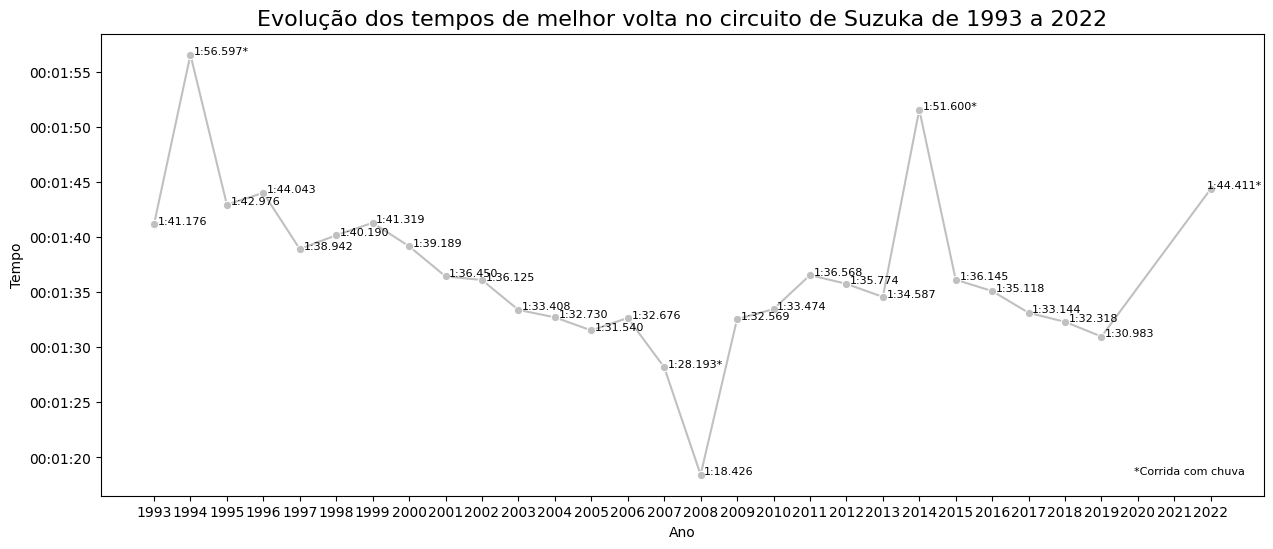

In [184]:
plt.figure(figsize=(15, 6))
fig3= sns.lineplot(data=voltas_mais_rápidas_japao_apos_1993, x='ano', y='tempo_em_datetime', markers=True, marker='o', color='silver')

for year, tempo, nome, t , clima in zip(voltas_mais_rápidas_japao_apos_1993['ano'][:-1], voltas_mais_rápidas_japao_apos_1993['tempo_em_datetime'][:-1],
                                        voltas_mais_rápidas_japao_apos_1993['nome'][:-1], voltas_mais_rápidas_japao_apos_1993['tempo'][:-1],
                                        voltas_mais_rápidas_japao_apos_1993['clima'][:-1]):
  if clima == 'chuva':
    fig3.annotate('{}*'.format(t), xy=(year + 0.1, tempo), color='k', fontsize=8)
  else:
    fig3.annotate('{}'.format(t), xy=(year + 0.1, tempo), color='k', fontsize=8)

fig3.annotate('{}*'.format('1:44.411'), xy=(2022 - 0.1, voltas_mais_rápidas_japao_apos_1993['tempo_em_datetime'][len(voltas_mais_rápidas_japao_apos_1993)-1:len(voltas_mais_rápidas_japao_apos_1993)]),
              color='k', fontsize=8)

fig3.annotate('*Corrida com chuva', xy=(2020 - 0.1, voltas_mais_rápidas_japao_apos_1993['tempo_em_datetime'][15:16]), color='k', fontsize=8)

plt.title('Evolução dos tempos de melhor volta no circuito de Suzuka de 1993 a 2022', fontsize=16)
plt.xlabel('Ano')
plt.ylabel('Tempo')
fig3.set_xticks(range(1993, 2023, 1))

plt.savefig('drive/MyDrive/Colab Notebooks/Portifólio/Formula 1/Dados/voltas_mais_rapidas.png')

plt.show()

**Conclusão:**

De 1993 à 2008 os carros evoluiram muito em velocidade. De 2008 a 2022 os carros ficaram um pouco mais lentos, porém ainda mais rápidos do que nos anos 90.

In [187]:
voltas_mais_rápidas_japao_apos_1993 = pd.DataFrame([voltas_mais_rápidas_japao_apos_1993['nome'].values,
                                                   voltas_mais_rápidas_japao_apos_1993['tempo'].values,
                                                   voltas_mais_rápidas_japao_apos_1993['ano'].values],
                                                   index=['nome', 'tempo', 'ano']).T

voltas_mais_rápidas_japao_apos_1993

,nome,tempo,ano
0,Alain Prost,1:41.176,1993
1,Damon Hill,1:56.597,1994
2,Michael Schumacher,1:42.976,1995
3,Jacques Villeneuve,1:44.043,1996
4,Heinz-Harald Frentzen,1:38.942,1997
5,Michael Schumacher,1:40.190,1998
6,Michael Schumacher,1:41.319,1999
7,Mika Häkkinen,1:39.189,2000
8,Juan Pablo Montoya,1:36.450,2001
9,Michael Schumacher,1:36.125,2002


In [188]:
voltas_mais_rápidas_japao_apos_1993.to_csv('drive/MyDrive/Colab Notebooks/Portifólio/Formula 1/Dados/voltas_mais_rápidas_japao_apos_1993.csv', index=False)